# Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

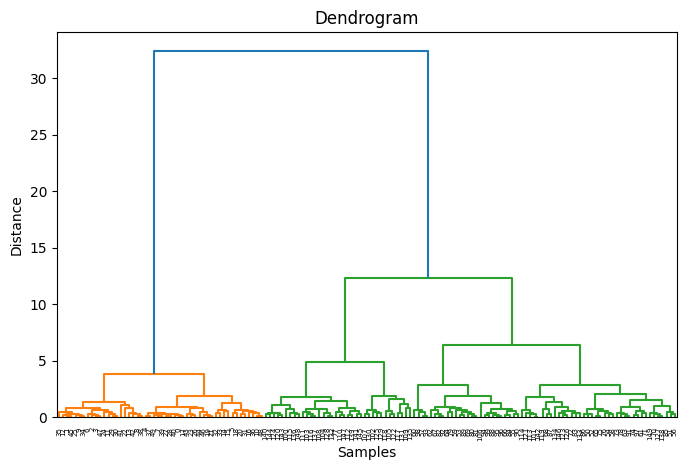

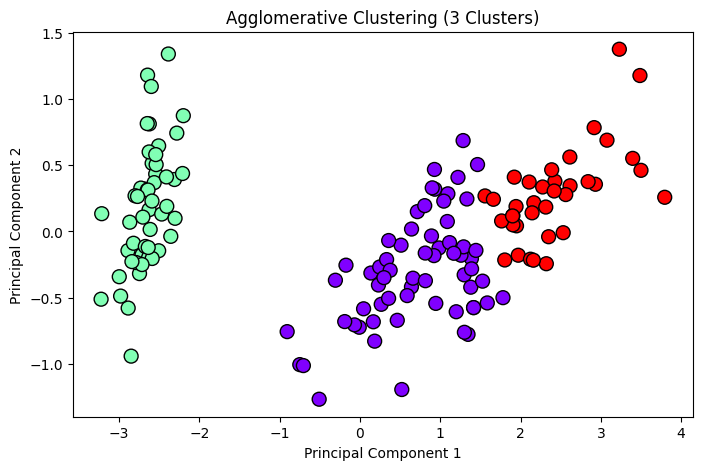

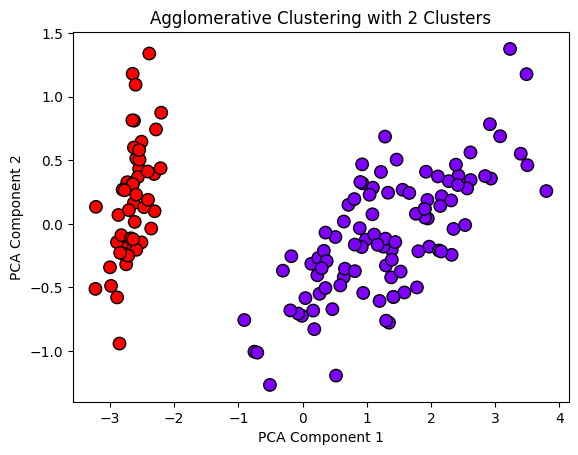

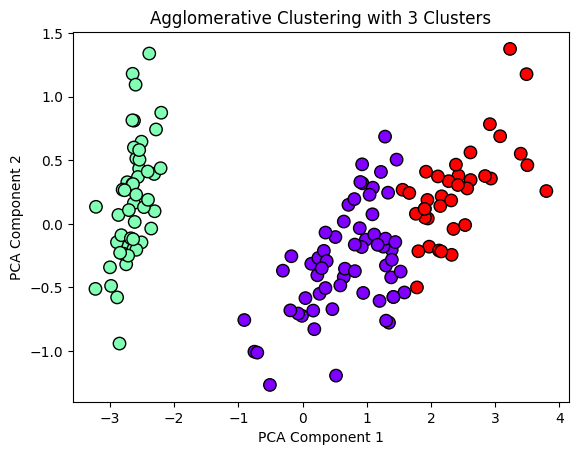

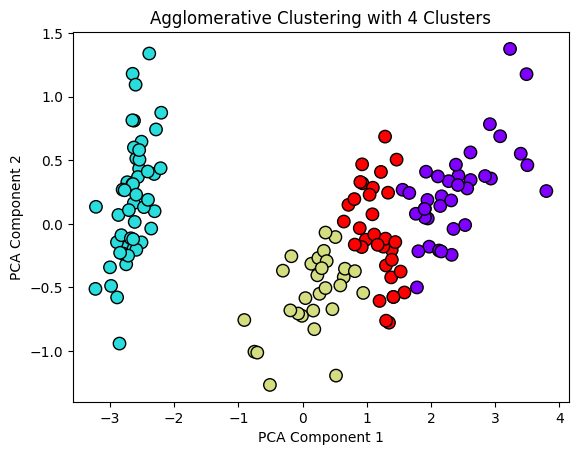

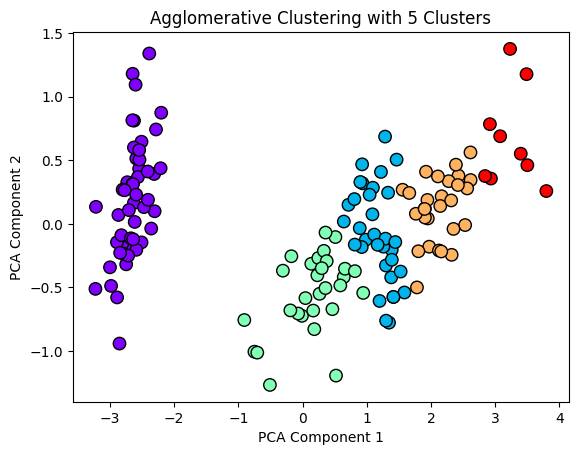

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Load the Iris dataset
data = load_iris()
X = data.data  # Features (4 dimensions: Sepal length, Sepal width, Petal length, Petal width)
y = data.target  # True labels (used here just for reference)

# =============================
# Step 1: Plot Dendrogram
# =============================

# Generate linkage matrix using Ward's method (minimizes variance within clusters)
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")  # X-axis represents individual data samples
plt.ylabel("Distance")  # Y-axis represents the distance between merged clusters
plt.show()

# Explanation:
# - 'linkage': Creates a hierarchical clustering model using the chosen method ('ward').
# - 'ward': A linkage criterion that minimizes the variance within clusters when merging.
# - The dendrogram shows how clusters are formed by merging data points step by step.
# - The height of each merge (y-axis) indicates the dissimilarity (distance) between clusters.

# =============================
# Step 2: Apply Agglomerative Clustering
# =============================

# Initialize the Agglomerative Clustering model with 3 clusters
clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict cluster labels for each data point
labels = clustering.fit_predict(X)

# Explanation:
# - 'n_clusters=3': Specifies the number of clusters (since the Iris dataset has 3 known classes).
# - 'fit_predict': Fits the clustering model to the data and returns the predicted cluster labels.
# - Agglomerative Clustering starts with each point as its own cluster and merges the closest clusters iteratively.

# =============================
# Step 3: PCA for Dimensionality Reduction
# =============================

# Apply PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explanation:
# - 'n_components=2': We reduce the data to 2 principal components for easier 2D visualization.
# - PCA is used because it is unsupervised and focuses on maximizing variance in the data.
# - LDA (Linear Discriminant Analysis) is not used here because it requires class labels and focuses on maximizing class separation (supervised learning).

# =============================
# Step 4: Plot the Clustering Results
# =============================

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100)
plt.title("Agglomerative Clustering (3 Clusters)")
plt.xlabel("Principal Component 1")  # X-axis represents the first principal component
plt.ylabel("Principal Component 2")  # Y-axis represents the second principal component
plt.show()

# Explanation of Scatter Plot:
# - 'X_pca[:, 0]': Data points along the x-axis (PCA Component 1).
# - 'X_pca[:, 1]': Data points along the y-axis (PCA Component 2).
# - 'c=labels': Colors the points based on the predicted cluster labels.
# - 'cmap': Color map used to differentiate clusters (e.g., 'rainbow' for distinct colors).
# - 'edgecolor': The color of the marker edges ('k' stands for black).
# - 's': Size of the markers (100 makes the points larger and more visible).

# =============================
# Step 5: Plot Clusters for Different Values of k (2 to 5)
# =============================

# Define a function to plot clusters for a given number of clusters (k)
def plot_clusters(X, k):
    # Initialize the Agglomerative Clustering model
    model = AgglomerativeClustering(n_clusters=k)
    # Fit the model and get the predicted labels
    labels = model.fit_predict(X)

    # Create a scatter plot for the clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=80)
    plt.title(f"Agglomerative Clustering with {k} Clusters")
    plt.xlabel("PCA Component 1")  # X-axis: First principal component
    plt.ylabel("PCA Component 2")  # Y-axis: Second principal component
    plt.show()

# Loop through values of k from 2 to 5 and plot the clustering results
for k in range(2, 6):
    plot_clusters(X_pca, k)

# Explanation:
# - The 'plot_clusters' function visualizes the result of agglomerative clustering for different numbers of clusters (k).
# - The loop iterates over k values from 2 to 5 to show how the clustering changes.
# - Increasing 'k' typically results in more, smaller clusters.

















# 1. Agglomerative Clustering:
# Agglomerative clustering is a type of hierarchical clustering. It starts by treating each data point as its own cluster and then iteratively merges the closest clusters based on a similarity metric. This process continues until all points belong to a single cluster or a specified number of clusters is reached.

# Why use Agglomerative Clustering?

# It does not require you to specify the number of clusters initially (although you can choose to do so).
# It creates a hierarchy of clusters, which can be visualized using a dendrogram.
# Suitable for small to medium-sized datasets (like the Iris dataset).
# Use Cases:

# Gene expression analysis in biology.
# Market segmentation.
# Image segmentation in computer vision.
# 2. Principal Component Analysis (PCA):
# PCA is a dimensionality reduction technique that transforms the data into a lower-dimensional space while preserving as much variance as possible.

# Why use PCA here?

# The Iris dataset has 4 features, making it hard to visualize directly in 2D.
# PCA reduces the dataset to 2 components for easier visualization.
# LDA (Linear Discriminant Analysis) is another technique that could be used for dimensionality reduction but it requires labels to maximize class separation, making it more suitable for supervised learning scenarios. PCA, on the other hand, is unsupervised and focuses on variance.
# 3. Dendrogram:
# A dendrogram is a tree-like diagram that shows the hierarchical relationship between data points. It illustrates the process of agglomerative clustering, where data points are merged step by step.

# Graph Explanation:

# The x-axis represents individual samples or clusters.
# The y-axis represents the distance or dissimilarity between clusters.
# Each horizontal line represents a merge, and the height of the line shows the distance between the merged clusters.
# 4. Scatter Plot Attributes:
# In the scatter plot:

# x: Values for the x-axis (PCA Component 1).
# y: Values for the y-axis (PCA Component 2).
# c: Color of the points, determined by the cluster labels.
# cmap: Color map used to distinguish different clusters.
# edgecolor: Color of the marker edges ('k' stands for black).
# s: Size of the markers (larger values make the points bigger).
# title: Title of the plot.
# xlabel and ylabel: Labels for the x-axis and y-axis.